In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from recipes.k_means import KMeans
from recipes.k_means_plus_plus import KMeansPlusPlus
from recipes.clustering_evaluator import ClusteringEvaluator
from recipes.random_clustering_restart import RandomClusteringRestarter

# Load Data

In [4]:
normal_points = pd.read_csv('../ingredients/k_means/normal.txt', sep='\t', header=None)
normal_points.columns = ['x', 'y']

In [5]:
normal_points

,x,y
0,5.275,4.893
1,5.339,4.476
2,4.887,4.234
3,5.895,4.843
4,4.429,4.915
...,...,...
95,5.299,5.611
96,5.075,4.574
97,6.149,4.746
98,5.101,4.838


In [6]:
unbalanced_points = pd.read_csv('../ingredients/k_means/unbalance.txt', sep=' ', header=None)
unbalanced_points.columns = ['x', 'y']

In [7]:
unbalanced_points

,x,y
0,151700,351102
1,155799,354358
2,142857,352716
3,152726,349144
4,151008,349692
...,...,...
6495,538990,412773
6496,533767,393738
6497,546754,394768
6498,541605,396515


# K-Means

## Normal

[]

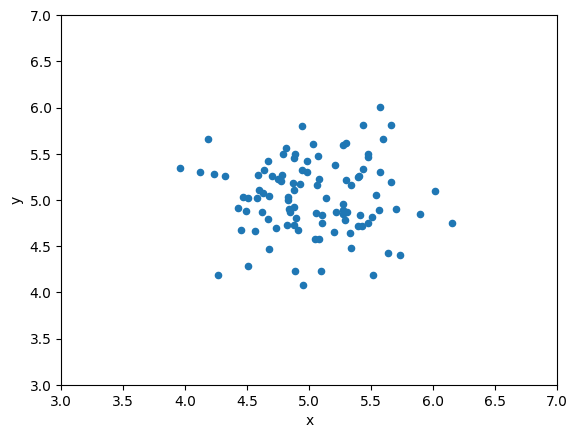

In [8]:
normal_points.plot.scatter(
    x='x',
    y='y'
)
plt.xlim(3, 7)
plt.ylim(3, 7)
plt.plot()

In [9]:
model = KMeans(k=4)

In [10]:
model.fit(normal_points)

[]

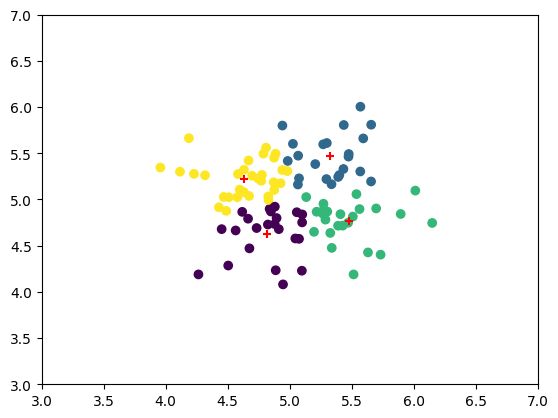

In [11]:
plt.scatter(
    normal_points['x'], 
    normal_points['y'], 
    c=model.labels
)
plt.scatter(
    model.centroids[:, 0],
    model.centroids[:, 1],
    marker='+',
    c='r'
)
plt.xlim(3, 7)
plt.ylim(3, 7)
plt.plot()

### Silhouette Score

In [12]:
evaluator = ClusteringEvaluator()

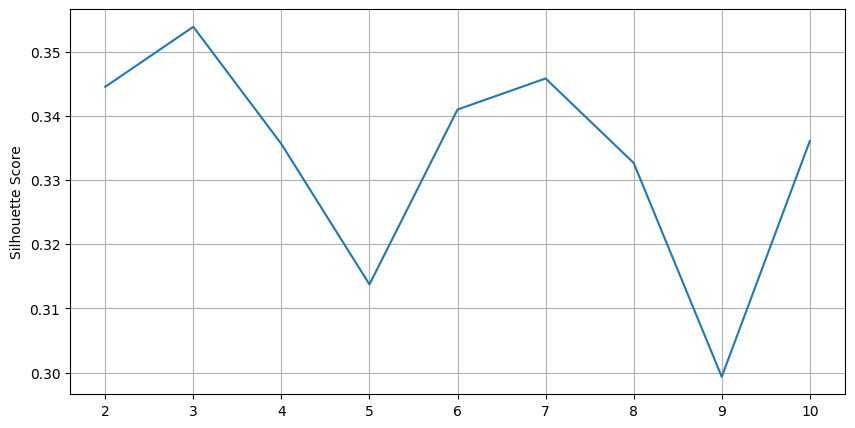

In [13]:
scores = {}
for k in range(2, 11):
    model = KMeans(k=k)
    model.fit(normal_points)
    evaluator.fit(normal_points, model.labels)
    scores[k] = evaluator.evaluate(metric='silhouette')[1]
    
plt.figure(figsize=(10,5))
plt.xticks(np.arange(2, 10, 1), minor=True)
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.ylabel('Silhouette Score')
plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

In [46]:
restarter = RandomClusteringRestarter(KMeans, ClusteringEvaluator, 20, 1000, 5, 'silhouette')

In [47]:
model, score = restarter.run(normal_points)
score

0.3721071649279773

[]

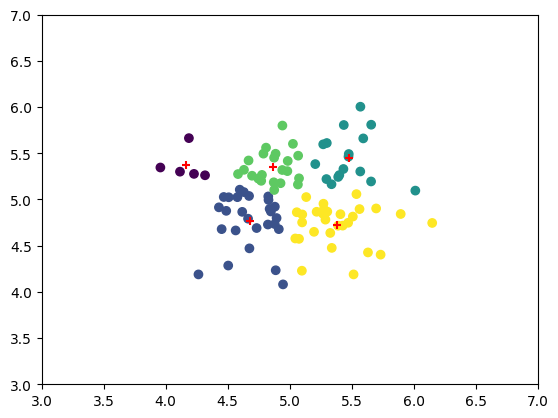

In [48]:
plt.scatter(
    normal_points['x'], 
    normal_points['y'], 
    c=model.labels
)
plt.scatter(
    model.centroids[:, 0],
    model.centroids[:, 1],
    marker='+',
    c='r'
)
plt.xlim(3, 7)
plt.ylim(3, 7)
plt.plot()

### Inter-Cluster Distance

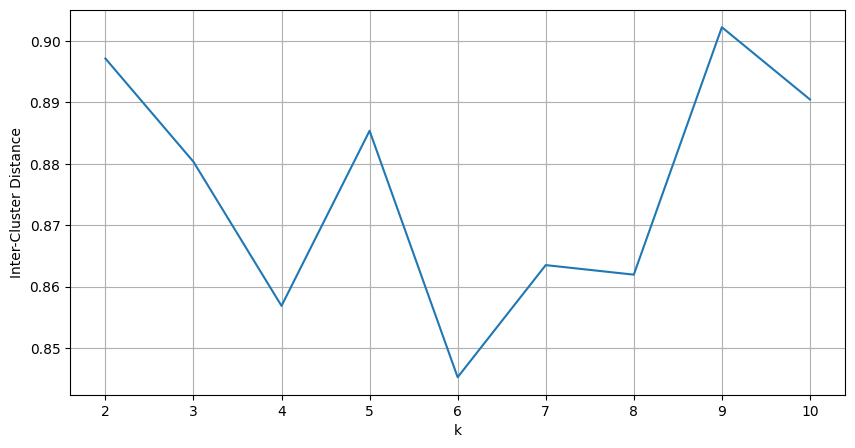

In [17]:
scores = {}
for k in range(2, 11):
    model = KMeans(k=k)
    model.fit(normal_points)
    evaluator.fit(normal_points, model.labels)
    scores[k] = evaluator.evaluate(metric='inter')[1]
    
plt.figure(figsize=(10,5))
plt.xticks(np.arange(2, 10, 1), minor=True)
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('k')
plt.ylabel('Inter-Cluster Distance')
plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

In [18]:
restarter = RandomClusteringRestarter(KMeans, ClusteringEvaluator, 20, 1000, 4, 'inter')

In [19]:
model, score = restarter.run(normal_points)
score

0.9346592999069031

[]

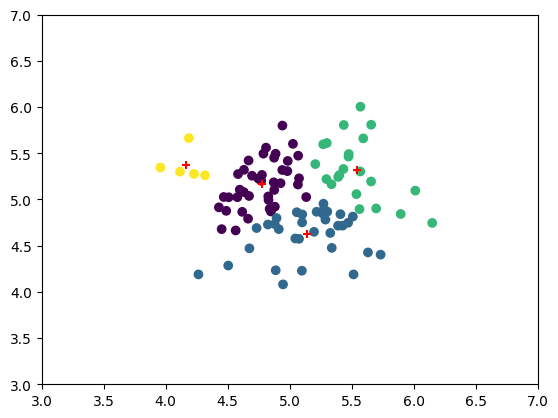

In [20]:
plt.scatter(
    normal_points['x'], 
    normal_points['y'], 
    c=model.labels
)
plt.scatter(
    model.centroids[:, 0],
    model.centroids[:, 1],
    marker='+',
    c='r'
)
plt.xlim(3, 7)
plt.ylim(3, 7)
plt.plot()

### Intra-Cluster Distance

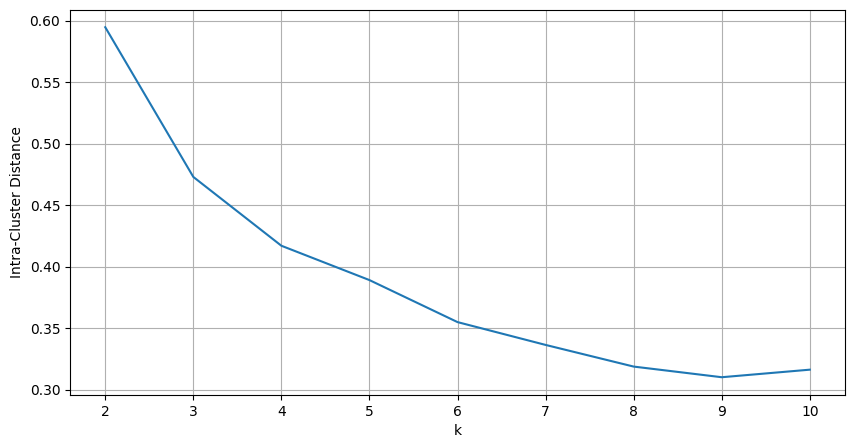

In [21]:
scores = {}
for k in range(2, 11):
    model = KMeans(k=k)
    model.fit(normal_points)
    evaluator.fit(normal_points, model.labels)
    scores[k] = evaluator.evaluate(metric='intra')[1]
    
plt.figure(figsize=(10,5))
plt.xticks(np.arange(2, 10, 1), minor=True)
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('k')
plt.ylabel('Intra-Cluster Distance')
plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

In [43]:
restarter = RandomClusteringRestarter(KMeans, ClusteringEvaluator, 20, 1000, 3, 'intra')

In [44]:
model, score = restarter.run(normal_points)
score

0.5005850264487427

[]

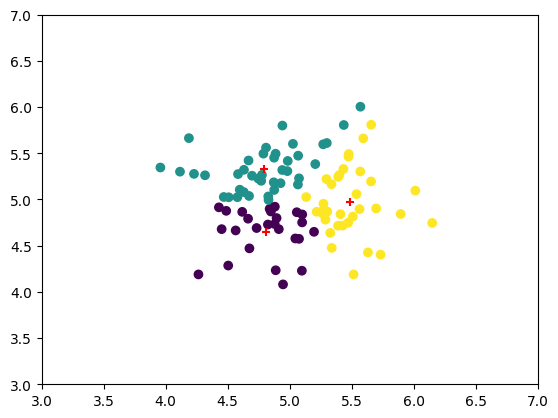

In [45]:
plt.scatter(
    normal_points['x'], 
    normal_points['y'], 
    c=model.labels
)
plt.scatter(
    model.centroids[:, 0],
    model.centroids[:, 1],
    marker='+',
    c='r'
)
plt.xlim(3, 7)
plt.ylim(3, 7)
plt.plot()

## Unbalanced

[]

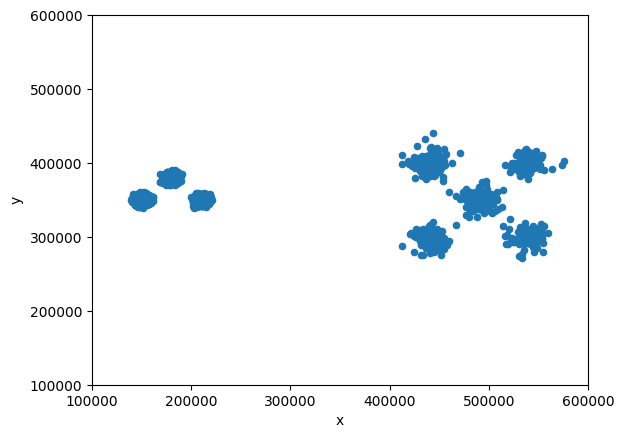

In [25]:
unbalanced_points.plot.scatter(
    x='x',
    y='y'
)
plt.xlim(100_000, 600_000)
plt.ylim(100_000, 600_000)
plt.plot()

In [26]:
model = KMeans(k=8, max_iterations=1000)

In [27]:
model.fit(unbalanced_points)

[]

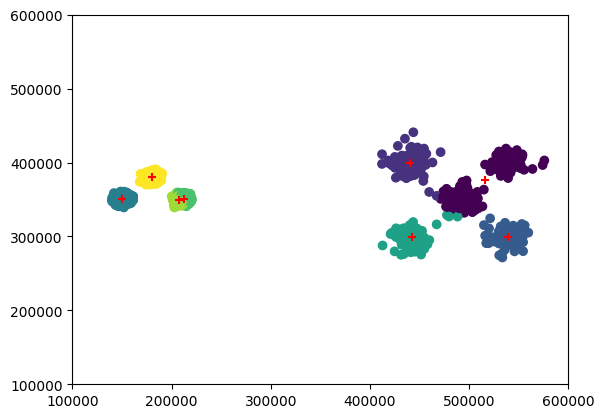

In [28]:
plt.scatter(
    unbalanced_points['x'], 
    unbalanced_points['y'], 
    c=model.labels
)
plt.scatter(
    model.centroids[:, 0],
    model.centroids[:, 1],
    marker='+',
    c='r'
)
plt.xlim(100_000, 600_000)
plt.ylim(100_000, 600_000)
plt.plot()

# K-Means Plus Plus

In [49]:
model = KMeansPlusPlus(k=4)

In [50]:
model.fit(normal_points)

[]

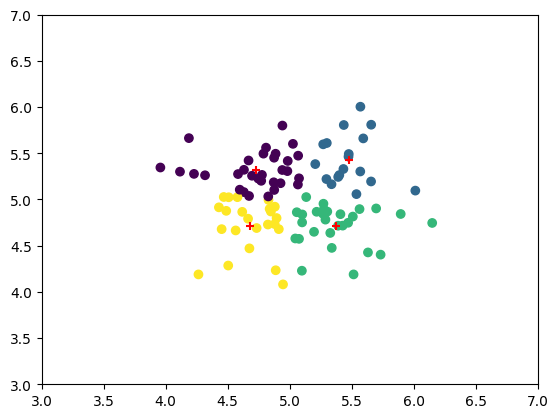

In [51]:
plt.scatter(
    normal_points['x'], 
    normal_points['y'], 
    c=model.labels
)
plt.scatter(
    model.centroids[:, 0],
    model.centroids[:, 1],
    marker='+',
    c='r'
)
plt.xlim(3, 7)
plt.ylim(3, 7)
plt.plot()